# Fourier Transform
***
The Fourier transform is used to transform an array of samples in the time domain into an array of complex numbers of the same size in the frequency domain.

An example of an algorithm that can calculate the Fourier transform is the discrete Fourier transform (DFT); you are more likely to see the fast Fourier transform (FFT) being used.

As seen in the implementation below, the time complexity of the DFT is O($n^2$), making it impractical for large sample sizes. The FFT is a more efficient algorithm that calculates the DFT with a lower time complexity.

This is the equation for the discrete Fourier transform:<br>
$
y[k] = \sum_{n=0}^{N-1}
e^{-2 \pi j \frac{kn}{N}} x[n]
$

***
### Fast Fourier Transform
Writing an implementation of the FFT can be difficult and time-consuming; instead, you should use the FFT function provided by the `scipy` module (`scipy.fft.fft`), you can also find an implementation in the `numpy` module (`numpy.fft.fft`). Both of these versions have been optimized for large sample sizes.

In [1]:
import random
# Import the two implementations of the FFT.
import numpy as np, numpy.fft, scipy.fft

# Generate four random numbers.
print(rand_number_array := np.array([random.random() for i in range(4)]))

[0.08379854 0.42914944 0.2996236  0.3730328 ]


In [2]:
# Using both implementations, results should be similar.
print(numpy_fft_output := numpy.fft.fft(rand_number_array))
print(scipy_fft_output := scipy.fft.fft(rand_number_array))

[ 1.18560438+0.j         -0.21582506-0.05611664j -0.4187601 +0.j
 -0.21582506+0.05611664j]
[ 1.18560438-0.j         -0.21582506-0.05611664j -0.4187601 -0.j
 -0.21582506+0.05611664j]


### Inverse Fast Fourier Transform
The inverse works as you would expect it to; you can convert the output of the FFT back into its original form, and although the return value is of a complex type, it is trivial to extract the real part, which I demonstrate below.

In [3]:
print(numpy_ifft_output := numpy.fft.ifft(numpy_fft_output))
print(scipy_ifft_output := scipy.fft.ifft(scipy_fft_output))

[0.08379854+0.j 0.42914944+0.j 0.2996236 +0.j 0.3730328 +0.j]
[0.08379854+0.j 0.42914944+0.j 0.2996236 -0.j 0.3730328 +0.j]


In [4]:
# Extracting the real part of each value in the array.
print([i.real for i in numpy_ifft_output])
print([i.real for i in scipy_ifft_output])

[0.08379854050416768, 0.42914943685201923, 0.2996236005218087, 0.3730327999744374]
[0.08379854050416768, 0.42914943685201923, 0.2996236005218087, 0.3730327999744374]


In [5]:
did_inverse_work = all(numpy.isclose(rand_number_array, numpy_ifft_output))
print("Did the inverse FFT work correctly?:", "Yes" if did_inverse_work else "No")

Did the inverse FFT work correctly?: Yes


***
## 1. Time vs Frequency Domain
The time and frequency domains are two different ways of representing signals. A signal is a sequence of data that varies over time, an example would be the intensity (loudness) and pitch (frequency) of a sound wave.

Samples can be taken of a signal at equally spaced time intervals, and then this array of values in the time domain can be converted into the frequency domain to extract the data contained in the signal.

***
## 2. Implementation of the DFT Algorithm

Here is an implementation of the discrete Fourier transform (DFT) algorithm in Python.

The Python implementation of the DFT below is derived from Ian McLoughlin's `04-fourier-transform.ipynb` notebook.

In [6]:
# This implementation should make the inefficiency of the DFT clear.
# Two for loops, one nested, looping through 0 < N
# N * N = O(n^2)

def dft(x_array):
    N = len(x_array) # Size of input
    
    # Pre-allocate the output array
    y_array = [*range(N)]

    # Loop for every element in the array
    for k in range(N):
        y_k = 0
        for n in range(N):
            # Transform each element of the input x_array
            # As seen in the formula above
            y_k += (np.e ** (-2 * np.pi * 1j * k * n / N) * x_array[n])
        y_array[k] = y_k
        
    return y_array

## 3. Generating a Sinusoidal Signal

A sinusoidal signal commonly known as the sine-wave can be described by the following properties described below.

$
x(t) = A
\sin(2 \pi f t + \phi)
$

- $A$ = Signal amplitude
- $f$ = Signal frequency
- $t$ = Time in seconds
- $\phi$ = phase_shift

The Python code below will generate a signal using the formula above. You can adjust the properties and it will generate a new signal for you.

<span style="color: red">You must run the code below to see the interactive sliders</span>

In [7]:
%pip install -q ipywidgets
import ipywidgets # For the sliders below
import matplotlib.pyplot as plt

# Number of samples to generate.
sample_count = random.randint(100, 200)

# Spaces between each of the samples.
sample_spacing = 1 / sample_count

# Generate time vector from 0 to 1 wih sample_spacing.
time_vector = np.arange(0, 1, sample_spacing)

def plot_signal(signal):
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Amplitude")

    # Plot the time-domain signal
    ax.plot(time_vector, signal)
    plt.show()
    
def generate_signal(amplitude=1, frequency=10, phase_shift=0):
    # Make it global so it can accessed below
    global my_signal

    # Generating the sinusoidal signal
    my_signal = amplitude * np.sin(2 * np.pi * frequency * time_vector + phase_shift)
    
    # Plot our new signal
    plot_signal(my_signal)

# Display the interactive sliders
display(ipywidgets.interactive(generate_signal, amplitude=(1, 100), frequency=(10, 200), phase_shift=(0, 20)))

Note: you may need to restart the kernel to use updated packages.


interactive(children=(IntSlider(value=1, description='amplitude', min=1), IntSlider(value=10, description='fre…

***
### 4. Converting to the Frequency Domain
Now we have a generated signal in the time domain. It needs to be converted to the frequency domain in order to extract its data. This is an opportunity to test the DFT algorithm above, which is written in Python.

In [8]:
dft_algorithm_list = [
    (scipy.fft.fft, "scipy.fft.fft"),
    # (numpy.fft.fft, "numpy.fft.fft"),
    (dft, "My DFT Algorithm")
]

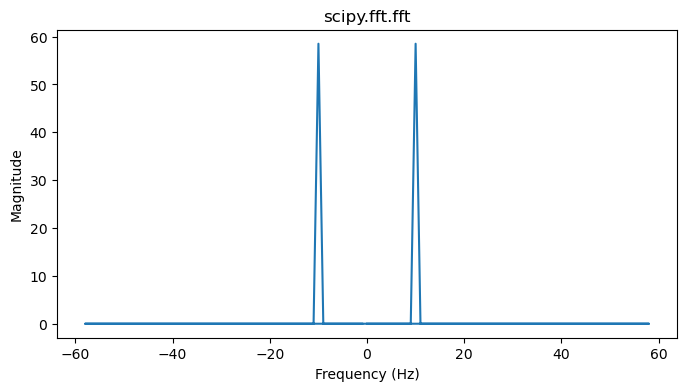

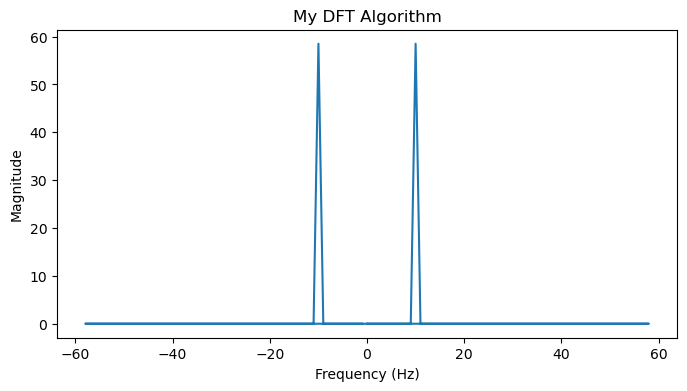

In [9]:
# Iterate over the list of DFT algorithms.
for func, func_title in dft_algorithm_list:
    # Calculate the frequency domain using the current DFT function
    frequency_domain_y = func(my_signal)
    
    # Calculate the frequency vector using the sample_spacing
    frequency_domain_x = scipy.fft.fftfreq(sample_count, sample_spacing)[:len(frequency_domain_y)]

    # Plot the signal in the frequency domain
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude")
    ax.set_title(func_title)
    
    ax.plot(frequency_domain_x, np.abs(frequency_domain_y))
    plt.show()

## 5. Plots of Parabolas
A parabola is a curve that has a symmetrical U-shape; it can either curve upwards or downwards, depending on what quadratic function was plotted. Every quadratic function produces a parabola when plotted.

I've included a list of quadratics below, and I'll plot each one to show the parabola.

In [10]:
# This is a list of quadratics to be plotted.
quadratic_func_list = [
    # X^2 + 0X + 0
    lambda x: x ** 2,
    # X^2 + 2X - 4
    lambda x: (x ** 2) + (x * 2) - 4,
    # X^2 + 0X + 4
    lambda x: (x ** 2) + 4,
    # -X^2 + 0X + 3
    lambda x: (-x ** 2) + 3
]

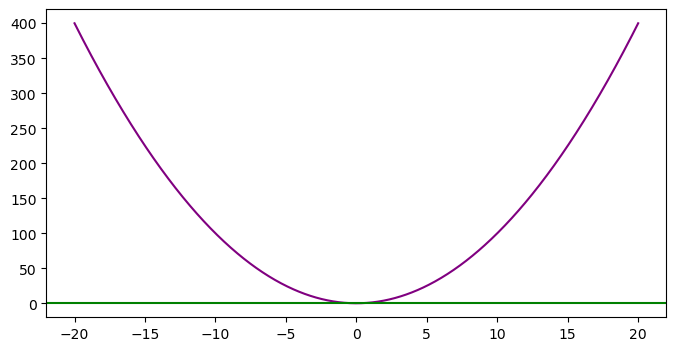

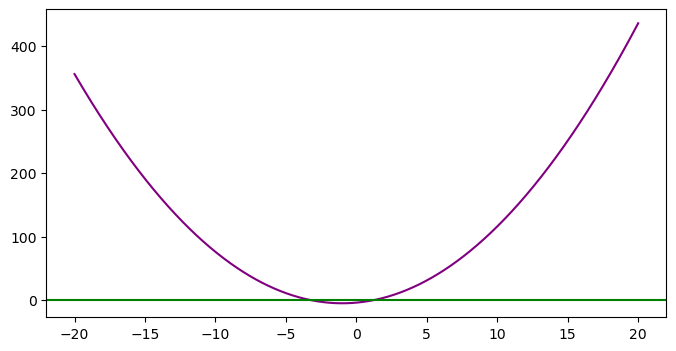

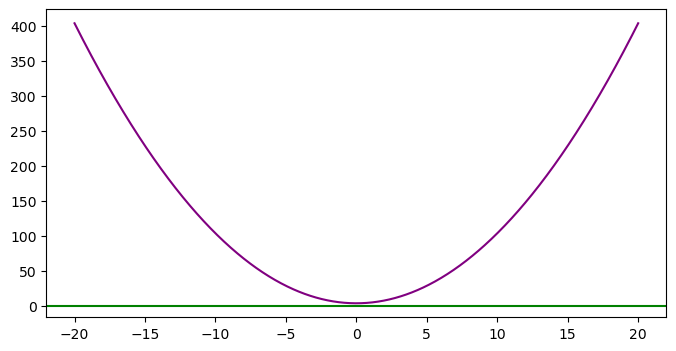

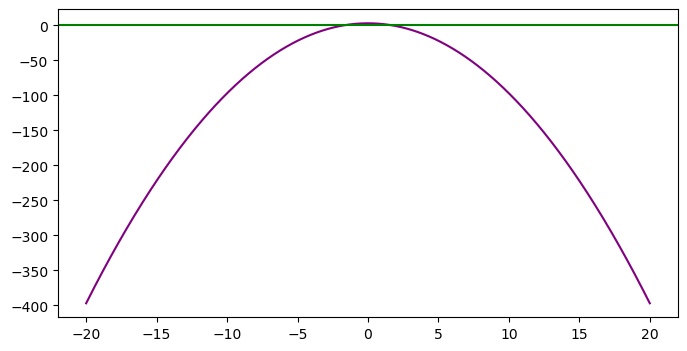

In [11]:
# Range of x values.
x = np.linspace(-20, 20, 1000)

for quadratic_func in quadratic_func_list:
    # Create figure.
    fig, ax = plt.subplots(figsize=(8, 4))

    # Plot using matplotlib.
    ax.plot(x, quadratic_func(x), color="purple")

    # Plot line across X axis at 0 on the Y axis.
    ax.axhline(0.0, color="green");

## 6. Quadratic Formula
The following is the form that a quadratic function must take, its a polynomial of degree 2 with three parts:

$f(x): ax^2 + bx + c$

You can find a Python function below that takes the form.

In [12]:
def quadratic_function(a, b, c, x):
    return (a * (x ** 2)) + (b * x) + c

# The coefficients to be used will be the following
a, b, c = 2, -5, 1

The quadratic formula is used to find the two values of x of a quadratic function that will satisfy the function; these are known as the roots.

This is the quadratic formula:

$
x = 
\frac{-b \pm \sqrt{b^2 - 4ac}}
{2a}
$

You can find a Python function below, that implements the quadratic formula.

In [13]:
import math, operator

def quadratic_formula(a, b, c, operation=operator.add):
    discriminant = (b ** 2) - 4 * a * c
    # If the discriminant is negative, no solution can be found.
    if discriminant < 0: return None, None

    top_half = operation(-b, math.sqrt(discriminant))
    bottom_half = 2 * a
    return top_half / bottom_half

# Get the roots, using the subtract in the formula for second root.
print("Root 1:", root_1 := quadratic_formula(a, b, c))
print("Root 2:", root_2 := quadratic_formula(a, b, c, operator.sub))

Root 1: 2.2807764064044154
Root 2: 0.21922359359558485


Now that the roots that satisfy the function have been found, it is time to plot them. I will show the roots with vertical red lines; this is where the parabola intercepts **0** on the Y axis.

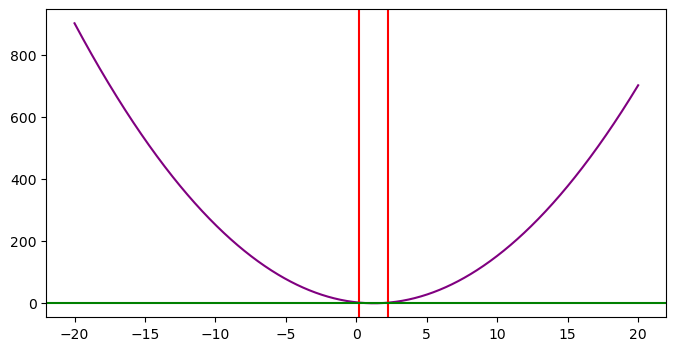

In [14]:
# Range of x values.
x = np.linspace(-20, 20, 1000)
fig, ax = plt.subplots(figsize=(8,4))

# Plot using matplotlib.
ax.plot(x, quadratic_function(a, b, c, x), color="purple")

# Check if there was a solution found
if root_1 != None and root_2 != None:
    # Plot verticles lines where the qudratic intercepts 0 on the Y axis
    ax.axvline(root_1, color="red")
    ax.axvline(root_2, color="red")

# Plot line across X axis at Y 0.
ax.axhline(0.0, color="green")
plt.show()

## References

* https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/04-fourier-transform.ipynb<br>
* https://en.wikipedia.org/wiki/Fourier_transform<br>
* https://en.wikipedia.org/wiki/Fast_Fourier_transform<br>
* https://en.wikipedia.org/wiki/Sinusoidal_wave<br>
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html<br>
* https://en.wikipedia.org/wiki/Quadratic_formula<br>